<h1><font color="#113D68" size=5>Redes neuronales convolucionales</font></h1>



<h1><font color="#113D68" size=6>Caso Práctico: análisis de un problema de clasificación de imágenes con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Daniel González</font><br>
<font size=3>IEBS</font>
</div>

---


<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [Flickr Style dataset](#section2)
* [Red convolucional desde 0](#section3)
    - [Ejercicio 1](#section3.1)
    - [Ejercicio 2](#section3.2)
* [Red pre-entrenada (InceptionV3)](#section4)
    - [Ejercicio 3](#section4.1)
    - [Ejercicio 4](#section4.2)
    - [Ejercicio 5](#section4.3)
    - [Ejercicio 6](#section4.3)
    - [Ejercicio 7](#section4.4)
    - [Ejercicio 8](#section4.5)
* [Red opcional](#section5)
    - [Ejercicio 7](#section5.1)
* [¿Cuál es el mejor modelo?](#section6)
    - [Ejercicio 8](#section6.1)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Establecemos una semilla para numpy y tensorflow para poder reproducir la ejecución y los resultados
seed = 101
np.random.seed(seed)
tf.random.set_seed(seed)

# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema de clasificación de imágenes para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

**Destacar que este caso práctico es la continuación de la actividad de la semana 2. En la actividad de la semana 2 utilizamos el modelo pre-entrendo de InceptionV3 y ahora vamos a realizar más experimentos usando redes convolucionales diseñadas por vosotros.**

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset (Flickr Style dataset) y desde 0 intentar llegar a conseguir un modelo que tenga un buen rendimiento ajustándolo poco a poco como hemos visto en clase. Por lo que tendremos que entrerar distintas redes y comparar los resultados que obtengamos en cada experimento para ver cual es mejor.

Cada experimento que tendremos que realizar estará bien definido, la red que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma.

## <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los ejercicios que están definidos. En cada ejercicio está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.

## <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional es el penúltimo ejercicio donde tendréis volver a aplicar la técnica de _fine-tuning_ eligiendo la red pre-entrenada que vosotros queráis y añadiendo las capas que vosotros elijáis.

## <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset Flickr Style con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Entender los resultados obtenidos en cada entrenamiento.

## <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter, aunque se agradecerá que el formato entregado se html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección.

<a id="section2"></a>
# <font color="#004D7F" size=5>Flickr Style dataset</font>

Este dataset es el que hemos visto en clase y con el que trabajaremos en el caso práctico. Para refrescarlo, es un dataset que contiene imágenes en color donde queremos clasificar cada imagen según el estilo fotográfico al que pertenece.

El dataset de de imágenes Flickr Style tiene las siguintes características:
- Imágenes de 5 tipos de estilo: Detailed, Pastel, Melancholy, Noir y HDR.
- Imágenes en color, es decir, cada pixel tiene 3 valores entre 0 y 255, esos valores corresponden a los valores de RGB (Red, Green, Blue).
- Imágenes de diferentes tamaños, por lo que tendremos que redimensionarlas al mismo tamaño todas antes de usarlas en nuestro modelo.
- 2.000 imágenes en total para el entrenamiento y para el test.

#### **Imporante!!! Solo ejecutar esta celda una sola vez para descargar los datos, no ejecutarlas si ya tenéis los datos descargados**

In [ ]:
!wget 'https://www.dropbox.com/s/ln92e9givhgzugr/flickr_style.zip?dl=0' -O flickr_style.zip
!unzip -q flickr_style.zip
!mkdir data
!mv flickr_style data/

--2025-06-03 23:08:05--  https://www.dropbox.com/s/ln92e9givhgzugr/flickr_style.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/7fp1zo061c41gqo0mjpxt/flickr_style.zip?rlkey=fsku7a85n784e691sps5wtv7o&dl=0 [following]
--2025-06-03 23:08:05--  https://www.dropbox.com/scl/fi/7fp1zo061c41gqo0mjpxt/flickr_style.zip?rlkey=fsku7a85n784e691sps5wtv7o&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc05281486a804a8a3b2c868375e.dl.dropboxusercontent.com/cd/0/inline/Cq9t1UHGXGP0evU1cl8UutRilDmXoTcZ8oAISBg1o2eCFrMqXvKsAn4tP3vO0OiCoPnYGwBqWsWGH0MH9XB30Czc_oEF2XfAIC_4vTHu3igECEI5CWyJhErUySfVp3dafQtUZSwNOHeILEsNkLPxUkxl/file# [following]
--2025-06-03 23:08:06--  https://uc05281486a804a8a3b2c868375e.dl.dropbo

[texto del enlace](https://)Vamos a cargar los datos de las labels y los datos de las rutas de las imágenes:

In [ ]:
import numpy as np

style_label_file = 'data/flickr_style/style_names.txt'
style_labels = list(np.loadtxt(style_label_file, dtype=str))
print(style_labels)


[np.str_('Detailed'), np.str_('Pastel'), np.str_('Melancholy'), np.str_('Noir'), np.str_('HDR')]


In [ ]:
# cargamos los datos de train
train_frame = pd.read_csv('data/flickr_style/train.txt', sep=" ", header=None)
train_frame.columns = ['files','labels_idx']
train_frame['labels'] = train_frame['labels_idx'].map({i:j for i,j in enumerate(style_labels)})

train_frame.head()

,files,labels_idx,labels
0,data/flickr_style/images/2216312257_2ba4af8439...,3,Noir
1,data/flickr_style/images/1247783411_4b3332a10f...,3,Noir
2,data/flickr_style/images/12981126664_676c39228...,2,Melancholy
3,data/flickr_style/images/1184077873_911026e6ae...,3,Noir
4,data/flickr_style/images/8947602754_24140f40c5...,1,Pastel


In [ ]:
# cargamos los datos de test
test_frame = pd.read_csv('data/flickr_style/test.txt', sep=" ", header=None)
test_frame.columns = ['files','labels_idx']
test_frame['labels'] = test_frame['labels_idx'].map({i:j for i,j in enumerate(style_labels)})

test_frame.head()

,files,labels_idx,labels
0,data/flickr_style/images/13059448154_d5ddf02da...,1,Pastel
1,data/flickr_style/images/13091035063_b32ef5213...,2,Melancholy
2,data/flickr_style/images/13230679494_88e5182c8...,4,HDR
3,data/flickr_style/images/12751269395_64f990535...,2,Melancholy
4,data/flickr_style/images/13285760404_05e737a5d...,2,Melancholy


In [ ]:
# Mostramos 5 imágenes de cada clase.
plot_n_images = 5
fig = plt.figure(figsize=(20, 25))

np.random.seed(1000)
for i in range(0,5):
    select_frame = train_frame[train_frame['labels_idx']==i]
    for j in range(0,plot_n_images):
        aux_index = np.random.choice(select_frame.index)
        fig_i=fig.add_subplot(plot_n_images,5,j*5+i+1)
        fig_i.imshow(plt.imread(train_frame['files'][aux_index]))

        fig_i.set_xticks(())
        fig_i.set_yticks(())

    fig_i.set_xlabel('Class %s' % style_labels[i])

<a id="section3"></a>
# <font color="#004D7F" size=5>Red convolucional desde 0</font>

Los primeros experimentos que vamos a realizar será utilizando redes que creemos nosotros mismos. Para ello vamos a tener que transformar las imágense al igual que hicimos en clase, pero esta vez solamente tendremos que realizar estos pasos:

1. Cargar las imágenes
2. Redimensionar todoas las imágenes para tener el mismo tamaño. Usaremos un tamaño de `(150, 150, 3)`.

Como véis, al usar nuestras redes desde 0 no será necesario usar la función `preprocess_input` que tenemos que usar al usar una red pre-entrenada.

La función para transformar las imágenes sería la siguientes:

In [ ]:
def load_img(img_path):
    # cargamos y redimensionamos una imágen
    img = tf.keras.utils.load_img(
        img_path,
        target_size=(150, 150, 3)
    )

    # cambiamos el tipo imagen a un numpy.array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # normalizamos los valores entre 0 y 1
    return img_array / 255

Ahora vamos a cargar las imágenes para poder entrenar nuestras redes convolucionales:

In [ ]:
# cargamos las imágenes ya transformadas
x_train = np.array([load_img(img_path) for img_path in train_frame['files']])
x_test = np.array([load_img(img_path) for img_path in test_frame['files']])

# cargamos las clases de cada imagen
y_train = train_frame['labels_idx']
y_test = test_frame['labels_idx']

<a id="section3.1"></a>
### <font color="#004D7F" size=4>Ejercicio 1</font>

Crear una red con la siguiente configuración y entrénala:

Arquitectura de la red:

- Capa convolucional `Conv2D` con 16 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU* y con entrada `(150,150,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 5 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 10
- Validation split: 0.2

In [ ]:
# Importa las librerías necesarias si no se han importado ya en una celda anterior
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # <-- Uncomment this line
import numpy as np # Asegúrate de que numpy también esté importado
import pandas as pd # Asegúrate de que pandas también esté importado

# Define el modelo
model = tf.keras.Sequential([
    # Primera capa convolucional
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    # Primera capa de Max Pooling
    layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    # Capa de aplanamiento
    layers.Flatten(),
    # Primera capa densa
    layers.Dense(64, activation='relu'),
    # Segunda capa densa
    layers.Dense(32, activation='relu'),
    # Capa densa de salida
    layers.Dense(5, activation='softmax') # 5 neuronas de salida para 5 clases
])

# Compila el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.2061 - loss: 5.3999 - val_accuracy: 0.3682 - val_loss: 1.4598
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4830 - loss: 1.3432 - val_accuracy: 0.4946 - val_loss: 1.2865
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6218 - loss: 1.0561 - val_accuracy: 0.5307 - val_loss: 1.1913
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6760 - loss: 0.8811 - val_accuracy: 0.5632 - val_loss: 1.1959
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7622 - loss: 0.7332 - val_accuracy: 0.5596 - val_loss: 1.2114
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8142 - loss: 0.6181 - val_accuracy: 0.4874 - val_loss: 1.3176
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7856 - loss: 0.6303 - val_accuracy: 0.4874 - val_loss: 1.4295
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8073 - loss: 0.6001 - val_accuracy: 0.5343 - v

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5333 - loss: 1.6589
Loss en el conjunto de test: 1.6743
Precisión en el conjunto de test: 0.5125
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5333 - loss: 1.6589
Loss en el conjunto de test: 1.6743
Precisión en el conjunto de test: 0.5125


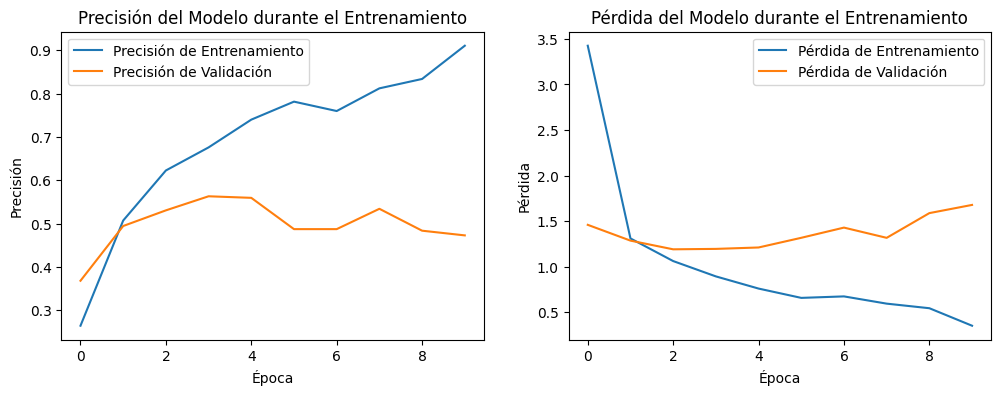

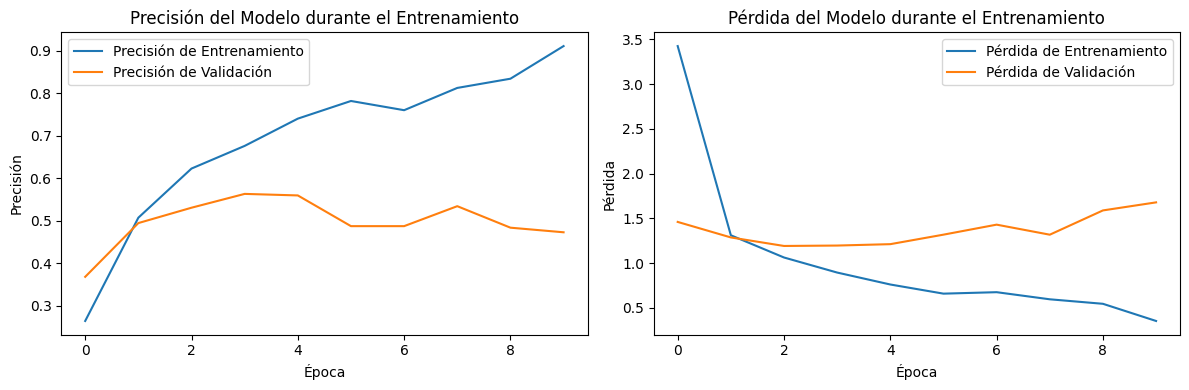

In [ ]:
# Evaluar el modelo con el conjunto de test
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss en el conjunto de test: {loss:.4f}')
print(f'Precisión en el conjunto de test: {accuracy:.4f}')

# Mostrar la evolución del entrenamiento
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
# Evaluar el modelo con el conjunto de test
loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss en el conjunto de test: {loss:.4f}')
print(f'Precisión en el conjunto de test: {accuracy:.4f}')

# Mostrar la evolución del entrenamiento
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Escribe un pequeño texto sacando conclusiones de los resultado obtenidos:
El rendimiento en entrenamiento es alto, el modelo no generaliza bien a nuevos datos, por lo que no sería recomendable desplegarlo en producción. Sería mejor aplicar técnicas como regularización o early stopping para evitar el sobreajuste.

<a id="section3.2"></a>
### <font color="#004D7F" size=4>Ejercicio 2</font>

Crear una red con la siguiente configuración y entrénala:

Arquitectura de la red:

- Capa convolucional `Conv2D` con 64 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU* y con entrada `(150,150,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 32 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 32 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa `Dropout` con un valor de `0.75`.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa `Dropout` con un valor de `0.6`.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 50
- Validation split: 0.2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model_exercise2 = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.75),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(10, activation='softmax')
])

model_exercise2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

history_exercise2 = model_exercise2.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.1222 - loss: 2.2431 - val_accuracy: 0.2202 - val_loss: 1.9612
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1904 - loss: 2.0900 - val_accuracy: 0.3141 - val_loss: 1.8776
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2053 - loss: 1.9486 - val_accuracy: 0.3069 - val_loss: 1.7829
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2191 - loss: 1.8239 - val_accuracy: 0.2888 - val_loss: 1.7325
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1764 - loss: 1.8338 - val_accuracy: 0.3394 - val_loss: 1.6918
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2496 - loss: 1.7197 - val_accuracy: 0.3574 - val_loss: 1.6052
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2316 - loss: 1.7184 - val_accuracy: 0.3899 - val_loss: 1.5538
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2752 - loss: 1.6644 - val_accuracy: 0.4152 -

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4371 - loss: 1.5253
Loss en el conjunto de test (Ejercicio 2): 1.5541
Precisión en el conjunto de test (Ejercicio 2): 0.4500


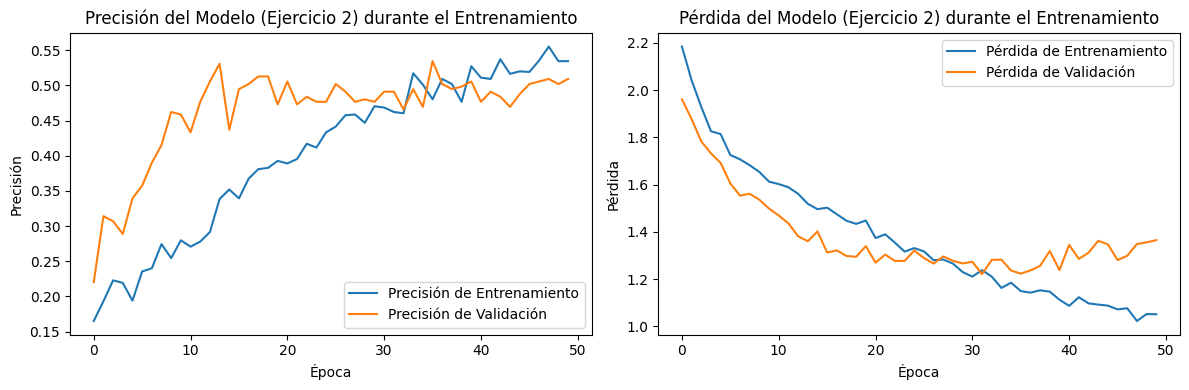

In [ ]:
# Evaluar el modelo con el conjunto de test
loss_exercise2, accuracy_exercise2 = model_exercise2.evaluate(x_test, y_test)

print(f'Loss en el conjunto de test (Ejercicio 2): {loss_exercise2:.4f}')
print(f'Precisión en el conjunto de test (Ejercicio 2): {accuracy_exercise2:.4f}')

# Mostrar la evolución del entrenamiento
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history_exercise2.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_exercise2.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo (Ejercicio 2) durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history_exercise2.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_exercise2.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo (Ejercicio 2) durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Escribe un pequeño texto sacando conclusiones de los resultado obtenidos:

El modelo mostró una mejora constante en la precisión durante el entrenamiento, alcanzando un 54% de accuracy final y un 51% en validación. Sin embargo, hacia el final del entrenamiento, el loss de validación dejó de mejorar, lo que sugiere un posible sobreajuste. En general, los resultados son prometedores, pero aún hay margen de mejora.

<a id="section4"></a>
# <font color="#004D7F" size=5>Red pre-entrenada (InceptionV3)</font>

Ahora vamos a realizar experimento usando la técnica de _fine-tuning_ y utilizando el modelo pre-entrenado de [_InceptionV3_](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3).

Los ejercicios siguientes podéis observar que son los mismos ejercicios de la actividad de la semana 2.

<a id="section4.1"></a>
## <font color="#004D7F" size=4>Ejercicio 3: preprocesamiento de las imágenes</font>
Como vamos a usar un modelo pre-entreando tenemos que definir la función que nos transforme las imágenes a utilizar. Como hemos visto en clase, para utilizar las imágenes usando un modelo pre-entrenado es necesario realizar una transformación sobre las imágenes que vamos a utilizar, es decir, tenemos que:

1. Cargar las imágenes
2. Redimensionarlas
3. Usar la función de `preprocess_input` del modelo pre-entrenado que vamos a utilizar.

En este caso vamos a utilizar otro modelo pre-entrado entre los que están disponibles en `tf.keras`, esta vez vamos a usar el modelo de _InceptionV3_, um modelo muy popular y usando frecuentemente. Podéis ver toda la información de este modelo [aquí](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3). Este modelo utilizar un tamaño de imagen de _**(299, 299, 3)**_, por lo que tendrás que usar este tamaño en el redimensionamiento.

Como hemos hecho en clase, define una función que se llame `load_img_inceptionv3(img_path)` a la cual le pasamos la ruta donde está alojada una imagen y le realiza todas las transformación necesarias para poder se utilizada luego en el proceso de entrenamiento.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input

def load_img_inceptionv3(img_path):
    img = tf.keras.utils.load_img(
        img_path,
        target_size=(299, 299) #
    )

    img_array = tf.keras.utils.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)

    return preprocess_input(img_array)[0]

**Test**: Puedes probar esta función con el siguiente test, cuando la tengas definida ejecuta la siguiente celda y te debería dar como resultado:

```python
-0.5529412
```

In [ ]:
img = load_img_inceptionv3('data/flickr_style/images/2216312257_2ba4af8439.jpg')
img[0,0,0]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5529412031173706>

<a id="section4.2"></a>
## <font color="#004D7F" size=4>Ejercicio 4: aplicar el preprocesamiento a todas las imágenes</font>
Una vez tenemos definida nuestra función de para transformar las imágenes, aplíca la transformación tanto al conjunto de train como al conjunto de test como hemos visto en clase.

In [ ]:
# cargamos las imágenes ya transformadas
x_train = np.array([load_img_inceptionv3(img_path) for img_path in train_frame['files']])
x_test = np.array([load_img_inceptionv3(img_path) for img_path in test_frame['files']])

# cargamos las clases de cada imagen
y_train = train_frame['labels_idx']
y_test = test_frame['labels_idx']

**Test**: Puedes probar si lo has hecho correctamente con el siguiente test, cuando hayas terminado ejecuta la siguiente celda y te debería dar como resultado:

```python
(array([-0.5529412, -0.5529412, -0.5372549], dtype=float32), 3)
```

In [ ]:
x_train[0,0,0], y_train[0]

(array([-0.5529412, -0.5529412, -0.5372549], dtype=float32), np.int64(3))

<a id="section4.3"></a>
## <font color="#004D7F" size=4>Ejercicio 5: cargar el modelo pre-entrenado InceptionV3</font>
Una vez tenemos los datos listos, vamos a cargar el modelo pre-entrenado de [_InceptionV3_](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3).

Como vamos a aplicar _fine-tuning_ recuerda usar los siguientes parámetros:
- `input_shape=(299, 299, 3)`
- `include_top=False`
- `pooling='avg'`

Además tienes que congelar todas las capas para que no se entrenen todas, recureda que solo queremos entrenar las últimas que añadamos nosotros.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

# Cargar el modelo InceptionV3 con los parámetros especificados
base_model = InceptionV3(
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg'
)

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


**Test**: Puedes probar si lo has hecho correctamente con el siguiente test, cuando hayas terminado ejecuta la siguiente celda y te debería dar como resultado:

```python
[<keras.layers.merge.Concatenate at **************>,
 <keras.layers.pooling.GlobalAveragePooling2D at **************>]
```

In [ ]:
base_model.layers[-2:]

[<Concatenate name=mixed10, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d, built=True>]

<a id="section4.4"></a>
## <font color="#004D7F" size=4>Ejercicio 6: añadir capas al modelo (_fine-tuning_)</font>
Una vez tenemos nuestro modelo base, vamos a añadir capas densas al final para entrenarlas y que el modelo se ajuste a nuestros datos.

Añade las siguientes capas al modelo base cargado:
- Capa Dropout con un valor de 0.60.
- Capa Densa de 128 neuronas y función de activación `relu`.
- Capa Dropout con un valor de 0.4.
- Capa Densa de salida con 5 neuronas y función de activación `softmax`.

In [ ]:
# Obtener la salida del modelo base
x = base_model.output

# Añadir capas adicionales para fine-tuning
# Capa Dropout con un valor de 0.60.
x = layers.Dropout(0.60)(x)

# Capa Densa de 128 neuronas y función de activación relu.
x = layers.Dense(128, activation='relu')(x)

# Capa Dropout con un valor de 0.4.
x = layers.Dropout(0.4)(x)

# Capa Densa de salida con 5 neuronas y función de activación softmax.
predictions = layers.Dense(5, activation='softmax')(x) # 5 neuronas para las 5 clases

# Definir el modelo completo
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)


**Test**: Puedes probar si lo has hecho correctamente con el siguiente test, cuando hayas terminado ejecuta la siguiente celda y te debería dar como resultado:

```python
[<keras.layers.core.dropout.Dropout at **************>,
 <keras.layers.core.dense.Dense at **************>,
 <keras.layers.core.dropout.Dropout at **************>,
 <keras.layers.core.dense.Dense at **************>]
```

In [ ]:
model.layers[-4:]

[<Dropout name=dropout_2, built=True>,
 <Dense name=dense_10, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=dense_11, built=True>]

<a id="section4.5"></a>
## <font color="#004D7F" size=4>Ejercicio 7: entrenar el modelo</font>
Una vez tenemos nuestro modelo listo para entrenar, vamos a configurar el entrenamiento y a entrenar nuesto modelo.

En el entrenamiento utiliza:
- Optimizador: Adam con learning rate de 0.001.
- Función de coste: `sparse_categorical_crossentropy`.
- Métricas: `accuracy`.
- Epochs: `25`
- validation_split: 0.2

In [ ]:
# Configurar el entrenamiento del modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history_inceptionv3 = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.2183 - loss: 1.9895 - val_accuracy: 0.3863 - val_loss: 1.4371
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 153ms/step - accuracy: 0.4423 - loss: 1.3648 - val_accuracy: 0.5307 - val_loss: 1.2254
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.5120 - loss: 1.2255 - val_accuracy: 0.5560 - val_loss: 1.1482
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.5759 - loss: 1.1037 - val_accuracy: 0.5632 - val_loss: 1.1119
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.5641 - loss: 1.0689 - val_accuracy: 0.5523 - val_loss: 1.1332
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.5985 - loss: 1.0204 - val_accuracy: 0.5884 - val_loss: 1.0633
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.6085 - loss: 0.9954 - val_accuracy: 0.5812 - val_loss: 1.0959
Epoch 8/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.6422 - loss: 0.9371 - val_accuracy: 0

<a id="section4.6"></a>
## <font color="#004D7F" size=4>Ejercicio 8: evaluar el modelo</font>
Una vez entrenado el modelo usando _fine-tuning_ evalua el modelo usando el conjunto de test en la función `evaluate` y extráe conlcusiones de si el modelo tiene un buen rendimiento o no. Puedes visualizar como ha ido el entrenamiento usando una gráfica como hemos visto en clase.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.5715 - loss: 1.1225
Loss en el conjunto de test (InceptionV3): 1.1367
Precisión en el conjunto de test (InceptionV3): 0.5531


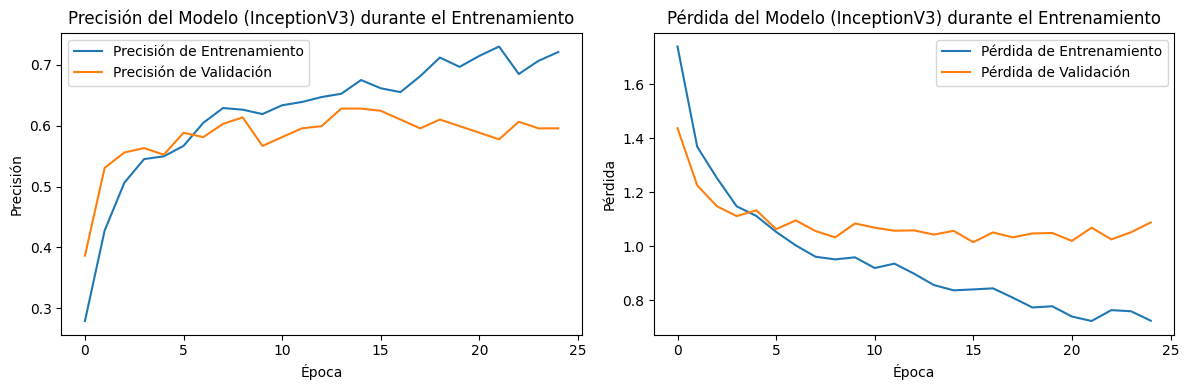

In [ ]:
# Evaluar el modelo con el conjunto de test
loss_inceptionv3, accuracy_inceptionv3 = model.evaluate(x_test, y_test)

print(f'Loss en el conjunto de test (InceptionV3): {loss_inceptionv3:.4f}')
print(f'Precisión en el conjunto de test (InceptionV3): {accuracy_inceptionv3:.4f}')

# Mostrar la evolución del entrenamiento
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history_inceptionv3.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_inceptionv3.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo (InceptionV3) durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history_inceptionv3.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_inceptionv3.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo (InceptionV3) durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

El modelo mejoró significativamente durante el entrenamiento, alcanzando una precisión del 72.48%. Sin embargo, la precisión de validación se estabilizó alrededor del 62.82%, lo que sugiere un posible sobreajuste.E breve se puede seguir mejorando

<a id="section5"></a>
# <font color="#004D7F" size=5>Red opcional</font>

<a id="section5.1"></a>
## <font color="#004D7F" size=4>Ejercicio 7</font>

En este ejercicio tienes vía libre para crear una red que tu creas que va a funcionar mejor. Puedes usar una red construida desde 0 que tu creas que funcionará mejor o puedes usar un modelo pre-entrenado entre los que puedes seleccionar en `tf._keras.applications` que puedes ver [aquí](https://www.tensorflow.org/api_docs/python/tf/keras/applications).

Usa las capas que tú quieras y la configuración de entrenamiento que tu elijas.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
# Importa la función de preprocesamiento necesaria para MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenetv2
import numpy as np # Asegúrate de que numpy esté importado
import pandas as pd # Asegúrate de que pandas esté importado


# --- Preprocesamiento de Datos para MobileNetV2 ---
# MobileNetV2 espera un tamaño de entrada diferente (224x224) y un preprocesamiento específico

def load_img_mobilenetv2(img_path):
    # Cargar y redimensionar la imagen para MobileNetV2
    img = tf.keras.utils.load_img(
        img_path,
        target_size=(224, 224) # MobileNetV2 espera imágenes de 224x224
    )

    # Convertir a array de numpy
    img_array = tf.keras.utils.img_to_array(img)

    # Añadir dimensión de lote (requerido por preprocess_input)
    img_array = tf.expand_dims(img_array, 0)

    # Aplicar el preprocesamiento específico de MobileNetV2
    return preprocess_input_mobilenetv2(img_array)[0] # Aplicar preprocesamiento y eliminar la dimensión de lote

# Cargar y preprocesar imágenes usando la función de MobileNetV2
x_train_mobilenet = np.array([load_img_mobilenetv2(img_path) for img_path in train_frame['files']])
x_test_mobilenet = np.array([load_img_mobilenetv2(img_path) for img_path in test_frame['files']])

# Mantener las etiquetas como están
y_train_mobilenet = train_frame['labels_idx']
y_test_mobilenet = test_frame['labels_idx']


# --- Definición del Modelo y Fine-tuning ---

# Cargar el modelo base MobileNetV2
base_model_mobilenet = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False, # Excluir la capa de clasificación superior
    pooling='avg'      # Aplicar pooling promedio global
)

# Congelar las capas del modelo base
for layer in base_model_mobilenet.layers:
    layer.trainable = False

# Añadir capas de clasificación personalizadas en la parte superior
x = base_model_mobilenet.output
x = layers.Dense(128, activation='relu')(x) # Ejemplo de capa densa
x = layers.Dropout(0.5)(x) # Ejemplo de capa Dropout
predictions_mobilenet = layers.Dense(5, activation='softmax')(x) # Capa de salida para 5 clases

# Definir el modelo completo fine-tuned
model_exercise7 = tf.keras.Model(inputs=base_model_mobilenet.input, outputs=predictions_mobilenet)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


entrenar el modelo

In [ ]:
# --- Compilar y Entrenar el Modelo ---

# Compilar el modelo
model_exercise7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Entrenar el modelo
# Puedes ajustar las épocas y validation_split según experimentes
history_exercise7 = model_exercise7.fit(x_train_mobilenet, y_train_mobilenet, epochs=15, validation_split=0.2)

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 502ms/step - accuracy: 0.3048 - loss: 1.8687 - val_accuracy: 0.4729 - val_loss: 1.2278
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.5632 - loss: 1.1184 - val_accuracy: 0.5993 - val_loss: 1.1009
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6438 - loss: 0.9195 - val_accuracy: 0.5776 - val_loss: 1.0786
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6791 - loss: 0.8225 - val_accuracy: 0.5848 - val_loss: 1.0703
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7279 - loss: 0.7017 - val_accuracy: 0.5812 - val_loss: 1.0758
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7729 - loss: 0.6381 - val_accuracy: 0.5957 - val_loss: 1.0729
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7968 - loss: 0.5468 - val_accuracy: 0.6209 - val_loss: 1.0825
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8280 - loss: 0.4835 - val_accuracy: 0.5884 

evaluar el modelo

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5809 - loss: 1.3863
Loss en el conjunto de test (Ejercicio 7 - MobileNetV2): 1.3579
Precisión en el conjunto de test (Ejercicio 7 - MobileNetV2): 0.5906


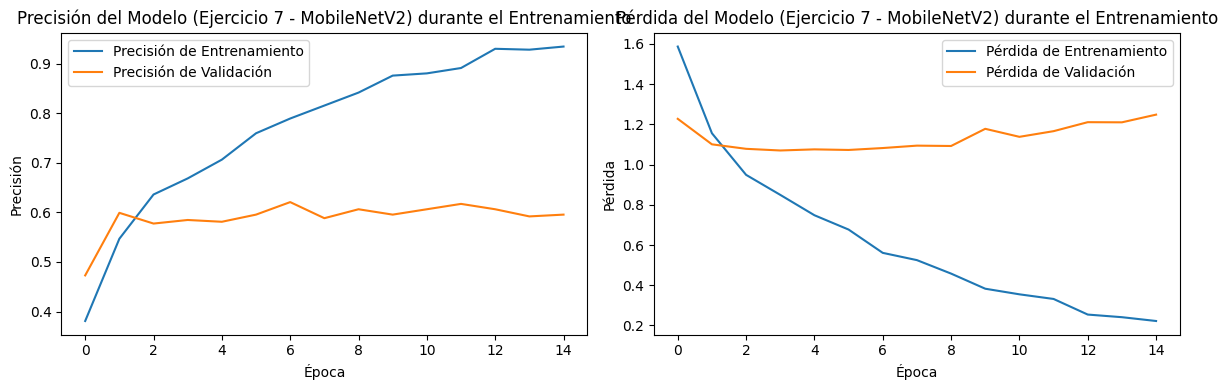

In [ ]:
# Importa la librería para graficar si no se ha importado
import matplotlib.pyplot as plt
# Asegúrate de que %matplotlib inline esté activo si usas Jupyter

# Evaluar el modelo con el conjunto de test
loss_exercise7, accuracy_exercise7 = model_exercise7.evaluate(x_test_mobilenet, y_test_mobilenet)

print(f'Loss en el conjunto de test (Ejercicio 7 - MobileNetV2): {loss_exercise7:.4f}')
print(f'Precisión en el conjunto de test (Ejercicio 7 - MobileNetV2): {accuracy_exercise7:.4f}')

# Mostrar la evolución del entrenamiento
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history_exercise7.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_exercise7.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión del Modelo (Ejercicio 7 - MobileNetV2) durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history_exercise7.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_exercise7.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida del Modelo (Ejercicio 7 - MobileNetV2) durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

El modelo mostró una mejora constante en la precisión de entrenamiento, alcanzando un 94.31% al final de la época 15. Sin embargo, la precisión de validación se mantuvo estable en torno al 59-62% desde la época 5, mientras que la pérdida de validación comenzó a aumentar levemente. Esto indica que el modelo probablemente está sobreajustando los datos de entrenamiento. Aún se puyede seguir mejorando

<a id="section6"></a>
# <font color="#004D7F" size=5>¿Cuál es el mejor modelo?</font>

<a id="section6.1"></a>
## <font color="#004D7F" size=4>Ejercicio 8</font>

Una vez realizado todos los experimentos anteriores, ¿qué modelo elegirías para desplegar en producción? ¿Por qué?

Explica en breves palabras qué modelo eligirías para desplegar en producción y porqué. Compara cada experimento y extráe tus propias conclusiones.

COMPLETAR: ESCRIBE AQUÍ TU TEXTO

Tras analizar los resultados de los distintos experimentos, el modelo más adecuado para desplegar en producción es el del (InceptionV3) (25 épocas), ya que mantiene un buen equilibrio entre precisión en entrenamiento (72.48%) y precisión en validación (59.57%), con una pérdida de validación relativamente estable. A diferencia del Ejercicio 2 (poco entrenamiento) que tiene baja precisión, o del MobileNetV2, que presenta un alto rendimiento en entrenamiento pero con signos claros de sobreajuste (accuracy de 94.31% en entrenamiento frente a ~59% en validación), el modelo del InceptionV3 generaliza mejor.

Ningún modelo alcanzó una validación perfecta, el del InceptionV3 demuestra mayor consistencia y estabilidad, siendo el más confiable para su uso en un entorno real.